In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-09-29 17:02:02--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-09-29 17:02:02 (36.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!ls

moore.csv  sample_data


In [16]:
# Load in the data
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

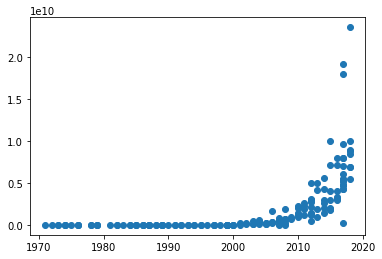

In [17]:
plt.scatter(X, y)
# Note this is exponential

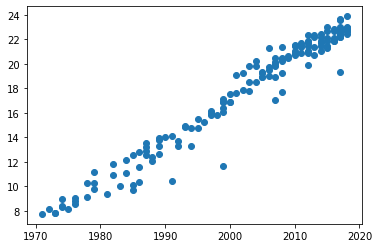

In [18]:
# But we are using linear regression => we want a linear model
y = np.log(y)
plt.scatter(X, y)

(162, 1)

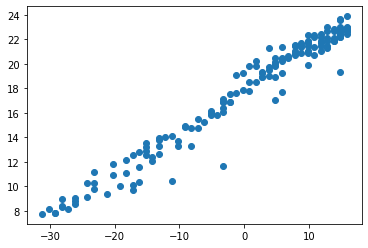

In [21]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()
plt.scatter(X, y)

In [24]:
# Tensorflow model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1, )))
model.add(tf.keras.layers.Dense(units = 1))

# Alternativly if you want to save the model:

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Input(shape=(1,)),
#   tf.keras.layers.Dense(1)
# ])


model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 350.2455
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 333.0108
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 240.0310
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 206.9024
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 182.2777
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 147.3817
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 132.8490
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 93.9528
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 68.0368
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 37.3570
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 31.2221
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 30.6294
Epoch 13/200
6/6 [========================

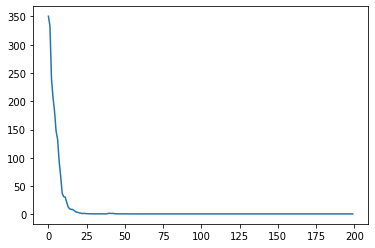

In [25]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [26]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

print("Time to double:", np.log(2) / a)

[array([[0.33203787]], dtype=float32), array([17.759972], dtype=float32)]
Time to double: 2.087554617396217


# **Pt 2: Making predictions**

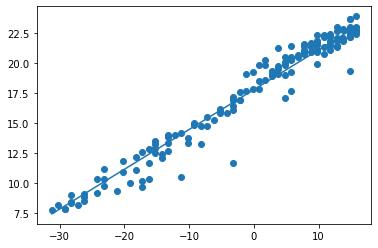

In [28]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, Yhat)

In [29]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True